Import

In [7]:
# Import OpenCV
import cv2
import numpy as np

2 Redimensionnement d’image


Ouvrir l'image

In [10]:
# Ouvrir l'image peppers-256.png
pepper_img = cv2.imread('./img/peppers-256-RGB.png')

# Afficher l'image
cv2.imshow('Original', pepper_img)

# Attendre que l'utilisateur appuie sur une touche pour fermer la fenêtre
cv2.waitKey(0)
cv2.destroyAllWindows()

# Afficher la taille de l'image
print("Taille de l'image originale :", pepper_img.shape)

Taille de l'image originale : (256, 256, 3)


Enregistre l'image en niveau de gris

In [11]:
# Enregistre l'image en niveau de gris
gray_pepper_img = cv2.cvtColor(pepper_img, cv2.COLOR_BGR2GRAY)
 
# Afficher l'image
cv2.imshow('Image niveau de gris', gray_pepper_img)

# Attendre que l'utilisateur appuie sur une touche pour fermer la fenêtre
cv2.waitKey(0)
cv2.destroyAllWindows()

Redimensionner l'image en 64x64

In [17]:
# Sélectionner un pixel sur 4
downsampled_pepper_img = gray_pepper_img[::4, ::4]

# Afficher l'image redimensionnée et échantillonnée
cv2.imshow('Redimensionnée et échantillonnée', downsampled_pepper_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Afficher la taille de l'image redimensionnée et échantillonnée
print("Taille de l'image redimensionnee et échantillonnee :", downsampled_pepper_img.shape)

Taille de l'image redimensionnee et échantillonnee : (64, 64)


3 Application de Filtres de Convolution

In [27]:
#Charger l'image
image = cv2.imread('./img/peppers-512.png')

#Définition des filtres
filtres = {
    "filtre 1": np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16,
    "filtre 2": np.ones((3, 3)) / 9,
    "filtre 3": np.array([[1, -3, 1], [-3, 9, -3], [1, -3, 1]]),
    "filtre 4": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    "filtre 5": np.array([[0, -1, -1], [1, 0, -1], [1, 1, 0]]) / 3,
    "filtre 6": np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], np.float32)
}

#Application des filtres
for nom, filtre in filtres.items():
    filtered_image = cv2.filter2D(image, -1, filtre)
    cv2.imshow(nom, filtered_image)
    cv2.waitKey(0)

#Fermer toutes les fenêtres à la fin
cv2.destroyAllWindows()

4 Morphologie Mathématique

In [ ]:

def erode(image, struct_element):
    eroded = np.zeros_like(image)
    s = struct_element.shape[0] // 2
    for i in range(s, image.shape[0] - s):
        for j in range(s, image.shape[1] - s):
            if np.all(struct_element == (image[i-s:i+s+1, j-s:j+s+1] == 255)):
                eroded[i, j] = 255
    return eroded

def dilate(image, struct_element):
    dilated = np.zeros_like(image)
    s = struct_element.shape[0] // 2
    for i in range(s, image.shape[0] - s):
        for j in range(s, image.shape[1] - s):
            if np.any(struct_element == (image[i-s:i+s+1, j-s:j+s+1] == 255)):
                dilated[i, j] = 255
    return dilated

#Charger l'image et la binariser
img = cv2.imread('./img/peppers-512.png', cv2.IMREADGRAYSCALE)
binary_img = img.copy()

#Binariser l'image  
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if binary_img[i, j] > 127:
            binary_img[i, j] = 255
        else:
            binary_img[i, j] = 0

# Définir un élément structurant
struct_element = np.ones((3,3), np.uint8)  # Exemple : Matrice 3x3 de 1

#Appliquer l'érosion et la dilatation
eroded_img = erode(binary_img, struct_element)
dilated_img = dilate(binary_img, struct_element)

#Ouverture et fermeture
opened_img = dilate(erode(binary_img, struct_element), struct_element)
closed_img = erode(dilate(binary_img, struct_element), struct_element)

# Image de différence
difference_img = cv2.absdiff(dilated_img, eroded_img)

# Afficher ou sauvegarder les résultats
cv2.imshow("Original", binary_img)
cv2.imshow("Eroded", eroded_img)
cv2.imshow("Dilated", dilated_img)
cv2.imshow("Opened", opened_img)
cv2.imshow("Closed", closed_img)
cv2.imshow("Difference", difference_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

5 Transformée de Fourier

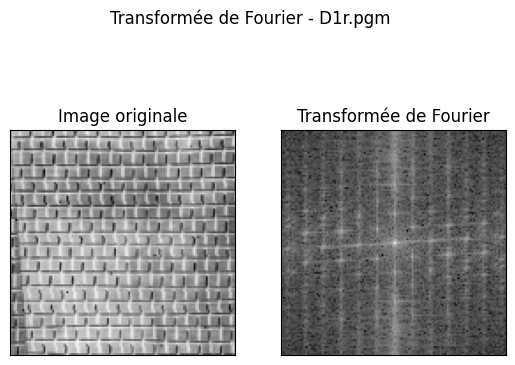

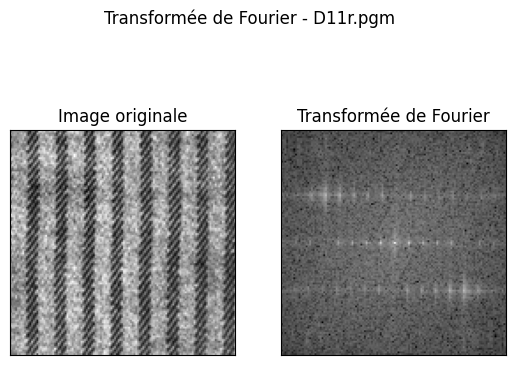

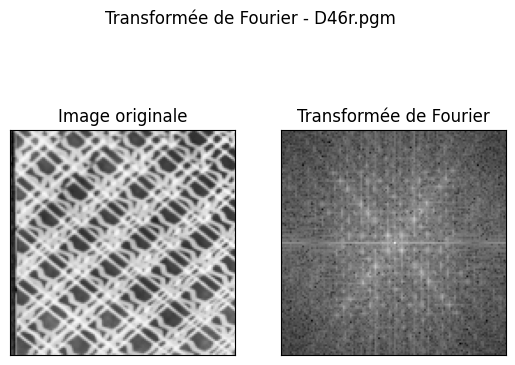

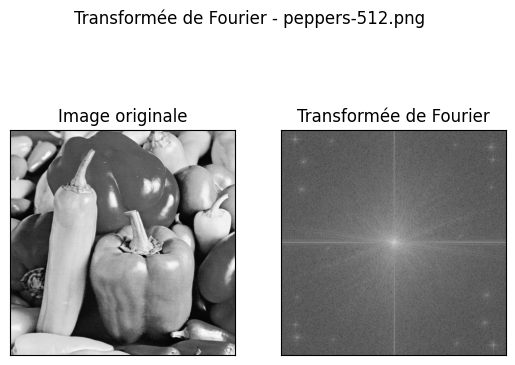

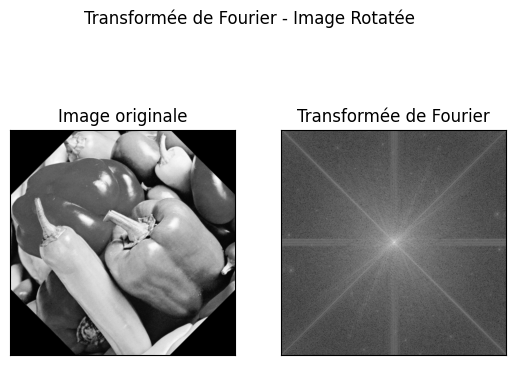

In [36]:
import cv2
import matplotlib.pyplot as plt

# Fonction pour afficher l'image et sa transformée de Fourier
def afficher_transformee_fourier(image, titre):
    # Conversion de l'image en niveaux de gris en type float32
    image_float32 = image.astype(np.float32)
    
    # Calcul de la transformée de Fourier 2D avec OpenCV
    f_transform = cv2.dft(image_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
    
    # Centrer la transformée de Fourier
    f_transform_shifted = cv2.fftshift(f_transform)
    
    # Calcul du logarithme de la magnitude pour une meilleure visualisation
    magnitude_spectrum = cv2.magnitude(f_transform_shifted[:, :, 0], f_transform_shifted[:, :, 1])
    magnitude_spectrum_log = cv2.log(magnitude_spectrum + 1)

    # Affichage de l'image originale
    plt.subplot(121), plt.imshow(image, cmap='gray')
    plt.title('Image originale'), plt.xticks([]), plt.yticks([])
    
    # Affichage de la transformée de Fourier
    plt.subplot(122), plt.imshow(magnitude_spectrum_log, cmap='gray')
    plt.title('Transformée de Fourier'), plt.xticks([]), plt.yticks([])
    
    # Titre global
    plt.suptitle(titre)
    
    # Affichage
    plt.show()

# Charger les images
image_D1r = cv2.imread('./img/D1r.pgm', cv2.IMREAD_GRAYSCALE)
image_D11r = cv2.imread('./img/D11r.pgm', cv2.IMREAD_GRAYSCALE)
image_D46r = cv2.imread('./img/D46r.pgm', cv2.IMREAD_GRAYSCALE)
image_peppers = cv2.imread('./img/peppers-512.png', cv2.IMREAD_GRAYSCALE)

# Afficher et commenter les transformées de Fourier des images D1r, D11r et D46r
afficher_transformee_fourier(image_D1r, 'Transformée de Fourier - D1r.pgm')
afficher_transformee_fourier(image_D11r, 'Transformée de Fourier - D11r.pgm')
afficher_transformee_fourier(image_D46r, 'Transformée de Fourier - D46r.pgm')

# Afficher la transformée de Fourier de l'image peppers-512.png
afficher_transformee_fourier(image_peppers, 'Transformée de Fourier - peppers-512.png')

# Rotation de l'image peppers
rows, cols = image_peppers.shape
rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
rotated_image = cv2.warpAffine(image_peppers, rotation_matrix, (cols, rows))

# Afficher et commenter la transformée de Fourier de l'image après rotation
afficher_transformee_fourier(rotated_image, 'Transformée de Fourier - Image Rotatée')
